In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from matplotlib import pyplot
from random import randint

Using TensorFlow backend.
/home/pedro/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pedro/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pedro/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pedro/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [2]:
samples = np.load("dataset_fixed/X_fixed.npy")
labels = np.load("dataset_fixed/Y_fixed.npy")

imageSize = 4096
xTrain = samples.reshape(2062, 4096)
#Train = samples.astype('float32')
xTrain /= 255

yTrain = keras.utils.to_categorical(labels, 10)
print(xTrain.shape)

(2062, 4096)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


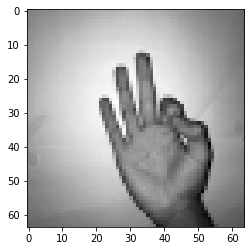

In [3]:
randValue = randint(0, samples.shape[0])
print(labels[randValue])
pyplot.imshow(samples[randValue], cmap='gray_r')


In [7]:
model = Sequential()
model.add(Dense(units=4096, activation='relu', input_shape=(imageSize,)))
model.add(Dense(units=36, activation='relu'))
model.add(Dense(units=36, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_6 (Dense)              (None, 36)                147492    
_________________________________________________________________
dense_7 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                370       
Total params: 16,930,506
Trainable params: 16,930,506
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
training = model.fit(xTrain, labels, batch_size = 20, epochs=20, verbose = 2, validation_split=0.1)

Train on 1855 samples, validate on 207 samples
Epoch 1/20
 - 32s - loss: 2.2819 - accuracy: 0.1175 - val_loss: 2.8623 - val_accuracy: 0.0000e+00
Epoch 2/20
 - 26s - loss: 2.2409 - accuracy: 0.1224 - val_loss: 3.5085 - val_accuracy: 0.0000e+00
Epoch 3/20
 - 29s - loss: 2.2177 - accuracy: 0.1159 - val_loss: 3.9835 - val_accuracy: 0.0000e+00
Epoch 4/20
 - 32s - loss: 2.1972 - accuracy: 0.1601 - val_loss: 4.3842 - val_accuracy: 0.0000e+00
Epoch 5/20
 - 21s - loss: 2.1768 - accuracy: 0.2059 - val_loss: 4.7994 - val_accuracy: 0.0000e+00
Epoch 6/20
 - 22s - loss: 2.1518 - accuracy: 0.2162 - val_loss: 5.0815 - val_accuracy: 0.0000e+00
Epoch 7/20
 - 34s - loss: 2.1232 - accuracy: 0.2679 - val_loss: 5.3255 - val_accuracy: 0.0000e+00
Epoch 8/20
 - 34s - loss: 2.0840 - accuracy: 0.3013 - val_loss: 5.6064 - val_accuracy: 0.0000e+00
Epoch 9/20
 - 34s - loss: 2.0468 - accuracy: 0.3089 - val_loss: 5.8795 - val_accuracy: 0.0097
Epoch 10/20
 - 35s - loss: 2.0056 - accuracy: 0.3094 - val_loss: 6.1163 - v